## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Егорова А. В. |
|-----------|--------------|
|  Группа   |  М8О-307Б-18 |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

In [30]:
#!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
#!curl -o mnist.pkl.gz https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
#!gzip -d mnist.pkl.gz

Теперь загружаем датасет:

In [31]:
import numpy as np
import my_framework
from sklearn.metrics import accuracy_score
import pickle
filename = 'mnist.pkl'
with open(filename,'rb') as f:
    MNIST = pickle.load(f)
print(f'{filename} opened')

mnist.pkl opened


Разбиение данных на обучающую и тестовую выборку:

In [32]:
labels = MNIST['Train']['Labels']
data = MNIST['Train']['Features'].astype(np.float32) / 256.
X_train, X_test = np.split(data, [data.shape[0]*8//10])
y_train, y_test = np.split(labels, [labels.shape[0]*8//10])
print('splitted')

splitted


Testing accuracy: 0.9079761904761905
Train accuracy: 0.9267261904761904
0.25864619948892303
0.9267261904761904


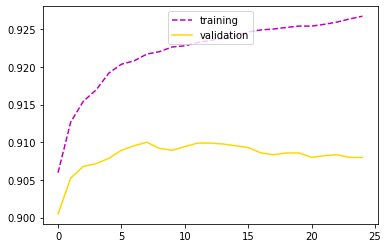

In [33]:
model = my_framework.Net()
model.fit(X_train, y_train, n_epoch=25, batch_size=4, lr=0.1, X_test=X_test, y_test=y_test, snaps=True)
l, acc = model.get_loss_acc(X_train, y_train)
print("Testing acc: {test_acc}".format(test_acc=accuracy_score(model.predict(X_test), y_test)))
print("Train acc: {train_acc}".format(train_acc=accuracy_score(model.predict(X_train), y_train)))
print(l, acc, sep='\n')
model.plot()

Нейросеть не переобучилась, так как разница между метриками мала.